### Imports necesarios:

In [1]:
import numpy as np  
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

## 1. Introduccion
### En este cuaderno vamos a trabajar con los siguientes algoritmos:
* Regresión de Ridge
* ElasticNet
* Regresión Bayesiana
* Lasso
* Quantile Regression
### Para los siguientes datasets:
* Casas de Boston (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices?authuser=0)
* Redimiento de los alumnos (https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?authuser=0)

In [2]:
## Importamos los datasets
import kagglehub
from kagglehub import KaggleDatasetAdapter

# IMPORTACION HOUSING
housing_path = "Boston.csv"
# Cargar la última versión del dataset
dfhousing = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # Formato (Pandas)
  "willianleite/boston-housing-dataset",  # Nombre del dataset
  housing_path
)
# Mostrar las primeras 5 filas del dataset housing
display("DATASET HOUSING",dfhousing.head(5))

# IMPORTACION STUDENT
student_path = "StudentPerformanceFactors.csv"
# Cargar la última versión del dataset
dfstudent = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # Formato (Pandas)
  "lainguyn123/student-performance-factors",  # Nombre del dataset
  student_path
)
# Mostrar las primeras 5 filas del dataset student
display("DATASET STUDENT",dfstudent.head(5))

c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\domid\AppData\Local\Temp\ipykernel_13288\4232616682.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfhousing = kagglehub.load_dataset(


'DATASET HOUSING'

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\domid\AppData\Local\Temp\ipykernel_13288\4232616682.py:19: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfstudent = kagglehub.load_dataset(


'DATASET STUDENT'

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Borramos la primera columna que es el ID
dfhousing = dfhousing.drop('Unnamed: 0', axis = 1)

### Información Dataset Boston:
* **cim**: Crimen per cápita
* **zn**: Zona residencial
* **indus**: Zona industrial
* **chas**: Río Charles (0/1)
* **nox**: Contaminación NOX
* **rm**: Habitaciones promedio
* **age**: Viviendas antiguas
* **dis**: Distancia empleo
* **rad**: Acceso a carreteras
* **TAX**: Impuesto propiedad
* **ptratio**: Alumnos por maestro
* **black**: Índice población negra
* **lstat**: % población baja
* **medv**: Valor medio viviendas (Esta va a ser nuestra variable objetivo)

### Información Dataset Estudiantes:
* **Hours_Studied:** Horas de estudio
* **Attendance:** Asistencia (%)
* **Parental_Involvement:** Involucramiento parental
* **Access_to_Resources:** Acceso a recursos
* **Extracurricular_Activities:** Actividades extracurriculares
* **Sleep_Hours:** Horas de sueño
* **Previous_Scores:** Puntajes previos
* **Motivation_Level:** Nivel de motivación
* **Internet_Access:** Acceso a internet
* **Tutoring_Sessions:** Tutorías mensuales
* **Family_Income:** Ingreso familiar
* **Teacher_Quality:** Calidad docente
* **School_Type:** Tipo de escuela
* **Peer_Influence:** Influencia de pares
* **Physical_Activity:** Actividad física
* **Learning_Disabilities:** Dificultades de aprendizaje
* **Parental_Education_Level:** Educación parental
* **Distance_from_Home:** Distancia a la escuela
* **Gender:** Género
* **Exam_Score:** Puntaje final (Esta va a ser nuestra variable objetivo)

### Funciones para las métricas a utilizar:
* **MAE**: Promedio del error absoluto entre valores reales y predichos.
* **MSE**: Promedio de los errores elevados al cuadrado, penaliza grandes errores.
* **RMSE**: Raíz cuadrada del MSE, mide el error en la misma escala que los datos.
* **R²**: Proporción de varianza explicada por el modelo, indica su precisión.
* **R²** Ajustado: R² corregido por el número de variables, evita sobreajuste.
* **RMSLE**: Mide el error logarítmico, penaliza más las diferencias en valores bajos.
* **VC**: Promedio de la validación cruzada, mide la estabilidad del modelo.

In [4]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
      
    
    # Número de registros en el dataset
    n = X_test.shape[0]
    # Número de columnas en el dataset
    p = X_test.shape[1]
    
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    R2_AJUSTADO = 1-(1-R2)*(n-1)/(n-p-1)
    #RMSLE = metrics.mean_squared_log_error(y_test,y_pred)
    #cv son las iteraciones
    validacion_cruzada_errores = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    #obtenemos el promedio
    VC = validacion_cruzada_errores.mean()
    
    print('MAE:', round(MAE,4))
    print('MSE:', round(MSE,4))
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('R2 AJUSTADO:', round(R2_AJUSTADO,4))
    #print('RMSLE:', round(RMSLE, 4) ) se ha quitado esta formula porque daba error por escalar en el caso del dataset Boston, Tenemos otras métricas similares (MAE, MSE RMSE)
    print('VC:', round(VC, 4) )
    return MAE,MSE,RMSE,R2,R2_AJUSTADO,VC

## Dos metricas más para las pruebas:
* Mean Bias Deviation (MBD): El **Mean Bias Deviation (MBD)** mide el sesgo promedio de las predicciones con respecto a los valores reales.

$$
MBD = \frac{1}{n} \sum (y_{\text{pred}} - y_{\text{real}})
$$

**Interpretación:**  
- **MBD ≈ 0**: No hay sesgo en las predicciones.  
- **MBD > 0**: El modelo tiende a **sobreestimar** los valores reales.  
- **MBD < 0**: El modelo tiende a **subestimar** los valores reales.  

* Explained Variance Score (EVS): mide qué porcentaje de la varianza de los datos es explicada por el modelo.

$$
EVS = 1 - \frac{\text{Var}(y_{\text{real}} - y_{\text{pred}})}{\text{Var}(y_{\text{real}})}
$$

**Interpretación:**  
- **EVS = 1**: El modelo explica el **100%** de la variabilidad de los datos.  
- **EVS ≈ 0**: El modelo no explica la variabilidad (es como una predicción constante).  
- **EVS < 0**: El modelo es **peor que un modelo trivial** (muy mal ajuste).

In [5]:
def Metricas_Adicionales(y_test, y_pred):
    # Mean Bias Deviation (MBD)
    MBD = np.mean(y_pred - y_test)
    
    # Explained Variance Score (EVS)
    EVS = metrics.explained_variance_score(y_test, y_pred)

    # Mostrar resultados
    print('MBD:', round(MBD, 4))
    print('EVS:', round(EVS, 4))

    return MBD, EVS

### Funcion para la distribucion de las variables

In [6]:
# Comprobar distribuciones
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

## 1.1 Limpieza de los dataset
### trataremos los datos antes de aplicar los modelos en todos los datasets: 
* Limpiar datos
* Codificacion
* Escalado

### DATASET BOSTON

In [7]:
display("DATASET BOSTON",dfhousing.head(5))

'DATASET BOSTON'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### A simple vista no se puede ver nada para limpiar en los datos ni codificar, solo que hay valores muy desescalados que habrá que escalar antes de aplicar cada algoritmo, está todo en numérico, vamos a ver si hay valores nulos:

In [8]:
dfhousing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
### miramos el schema por si son todos numéricos realmente
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
dfhousing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Vamos a ver la distribucion de las variables para tenerlas en cuenta para el escalado

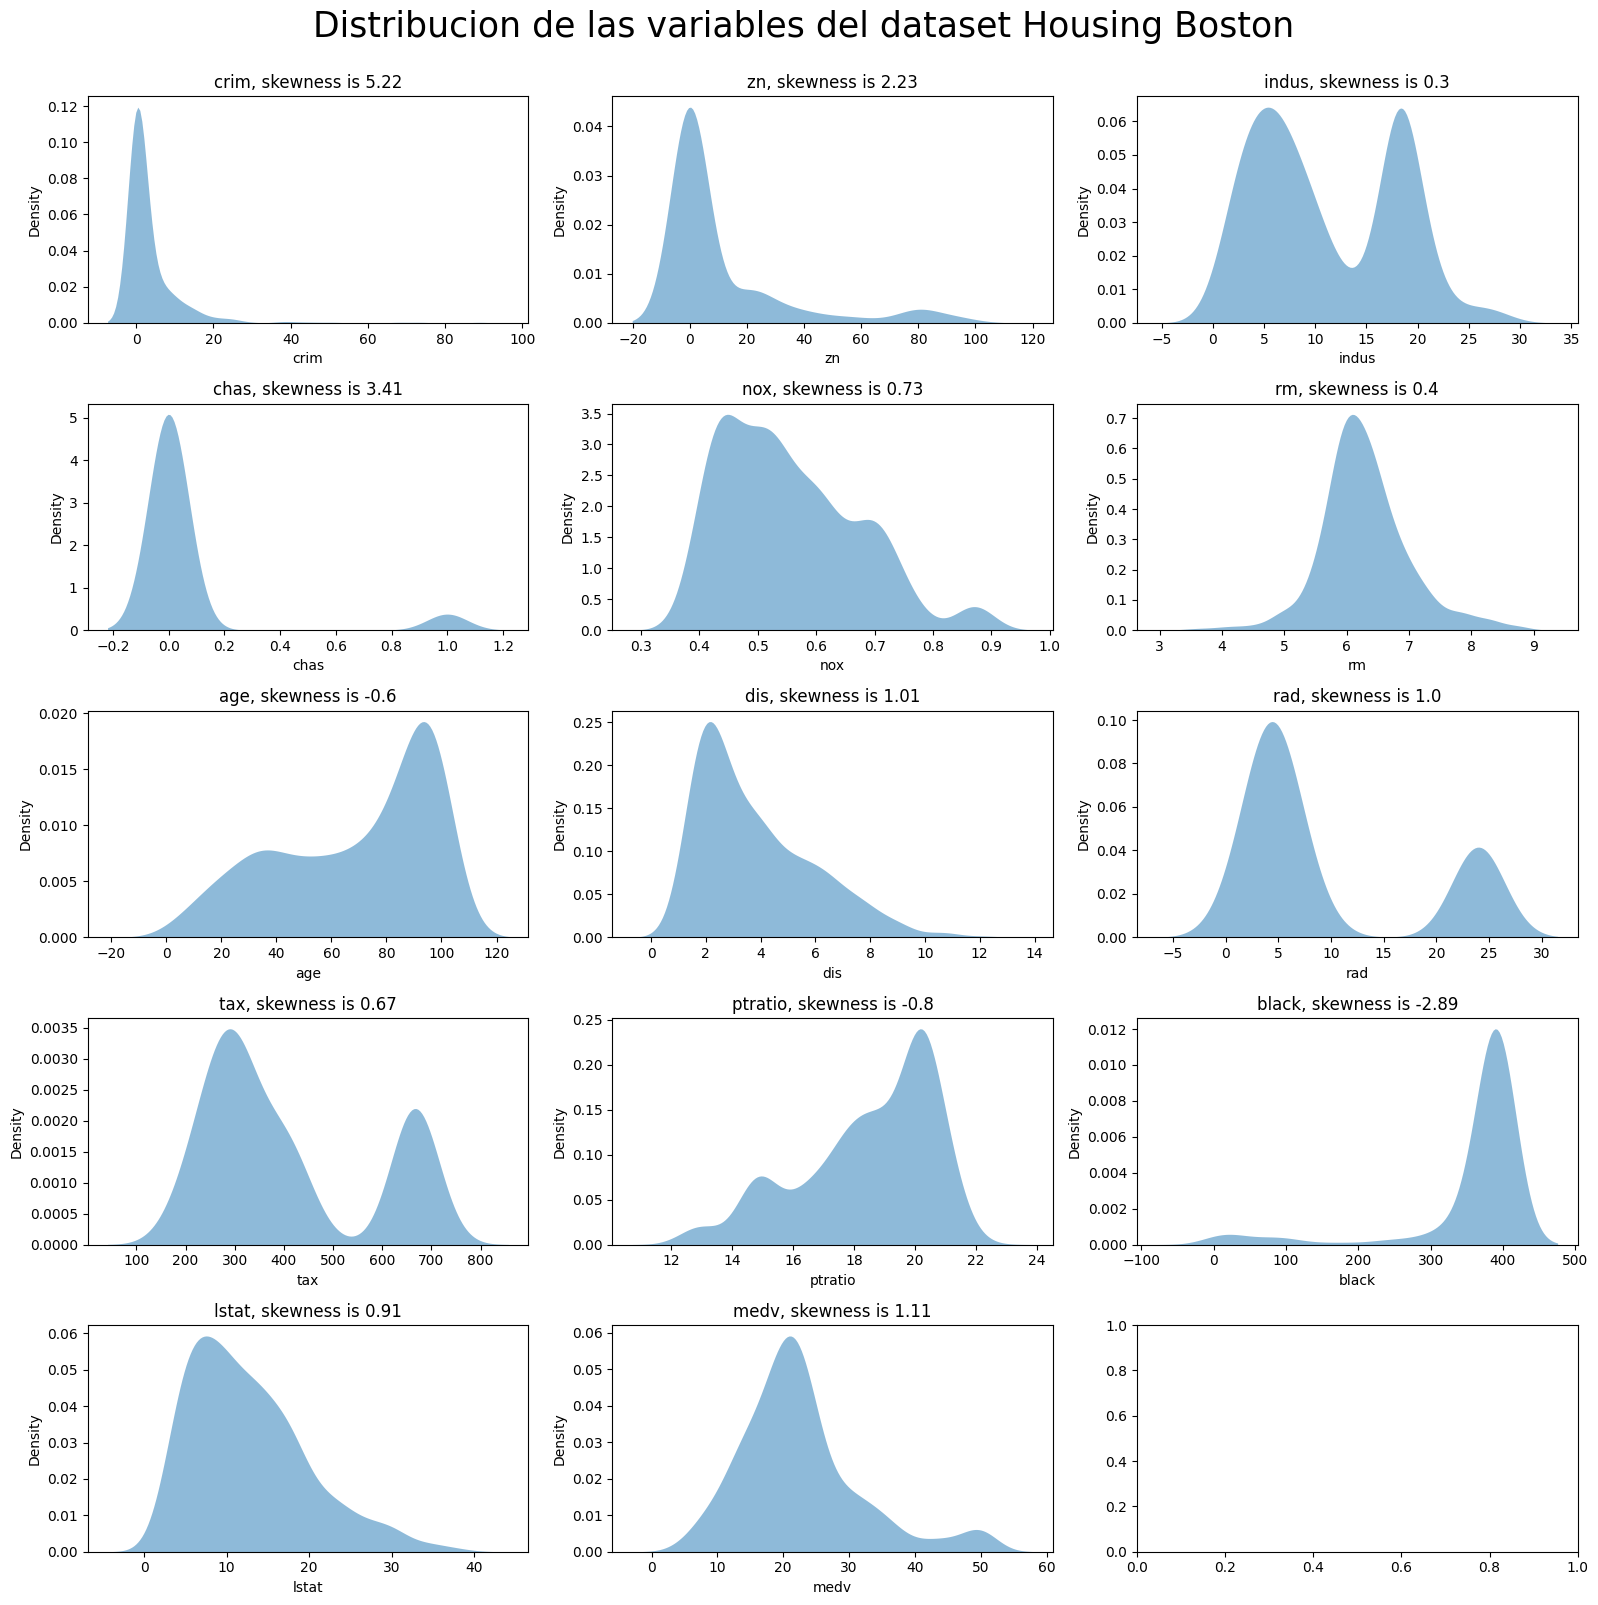

In [11]:
numeric_columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat", "medv"]
dist_custom(dfhousing, columns_list=numeric_columns, rows=5, cols=3, suptitle='Distribucion de las variables del dataset Housing Boston')
plt.tight_layout()

### Escalado variables (Conclusión de la distribución)

| Variable | Escalado         | Justificación                      |
|----------|-----------------|------------------------------------|
| crim     | RobustScaler    | Valores atípicos altos.     |
| zn       | MinMaxScaler    | Rango entre 0 y 100.              |
| indus    | StandardScaler  | Distribución casi normal.         |
| chas     | No escalar      | Variable binaria.                 |
| nox      | StandardScaler  | Distribución casi normal.         |
| rm       | StandardScaler  | Ligera asimetría, pero normal.    |
| age      | StandardScaler  | Distribución casi normal.         |
| dis      | RobustScaler    | Valores atípicos altos.           |
| rad      | RobustScaler    | Distribución muy sesgada.         |
| tax      | RobustScaler    | Valores atípicos y asimetría.     |
| ptratio  | StandardScaler  | Distribución casi normal.         |
| black    | MinMaxScaler    | Valores en un rango fijo.         |
| lstat    | StandardScaler  | Ligera asimetría, pero normal.    |
| medv     | No escalar      | Variable objetivo.                |

In [12]:
# Escaladores
scalers = {
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

# Columnas y escalador
scaling_dict = {
    "crim": "RobustScaler",
    "zn": "MinMaxScaler",
    "indus": "StandardScaler",
    "nox": "StandardScaler",
    "rm": "StandardScaler",
    "age": "StandardScaler",
    "dis": "RobustScaler",
    "rad": "RobustScaler",
    "tax": "RobustScaler",
    "ptratio": "StandardScaler",
    "black": "MinMaxScaler",
    "lstat": "StandardScaler"
}

# Aplicamos el escalado
scaled_features = {}
for col, scaler_name in scaling_dict.items():
    scaler = scalers[scaler_name]
    scaled_features[col] = scaler.fit_transform(dfhousing[[col]])

# Convertir a DataFrame escalado
dfhousing_escalao = dfhousing.copy()
for col in scaled_features:
    dfhousing_escalao[col] = scaled_features[col]

# Mostrar primeras filas
dfhousing_escalao.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.069593,0.18,-1.287909,0,-0.144217,0.413672,-0.120013,0.285777,-0.20,-0.087855,-1.459000,1.000000,-1.075562,24.0
1,-0.063755,0.00,-0.593381,0,-0.740262,0.194274,0.367166,0.569789,-0.15,-0.227390,-0.303094,1.000000,-0.492439,21.6
2,-0.063760,0.00,-0.593381,0,-0.740262,1.282714,-0.265812,0.569789,-0.15,-0.227390,-0.303094,0.989737,-1.208727,34.7
3,-0.062347,0.00,-1.306878,0,-0.835284,1.016303,-0.809889,0.924391,-0.10,-0.279070,0.113032,0.994276,-1.361517,33.4
4,-0.052144,0.00,-1.306878,0,-0.835284,1.228577,-0.511180,0.924391,-0.10,-0.279070,0.113032,1.000000,-1.026501,36.2


### DATASET ESTUDIANTES

In [13]:
display("DATASET STUDENT",dfstudent)

'DATASET STUDENT'

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Comprobamos si hay nulos


In [14]:
dfstudent.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### borramos los nulos, de 6607 registros, son muy pocos nulos

In [15]:
dfstudent = dfstudent.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])

In [16]:
dfstudent.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [17]:
dfstudent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

### Convertimos las categoricas a numéricas para ver su dispersion de las cariables y estudiar que escalado hacer

In [18]:
import pandas as pd

# ---------- LIMPIEZA de strings antes de mapear ----------
cols_to_clean = [
    'Parental_Involvement',
    'Motivation_Level',
    'Family_Income',
    'Teacher_Quality',
    'Parental_Education_Level',
    'Distance_from_Home'
]

for col in cols_to_clean:
    dfstudent[col] = dfstudent[col].astype(str).str.strip().str.lower()

# ---------- ORDINALES: mapeo manual con manejo de valores no mapeados ----------
ordinal_mappings = {
    'Parental_Involvement': {'low': 0, 'medium': 1, 'high': 2},
    'Motivation_Level': {'low': 0, 'medium': 1, 'high': 2},
    'Family_Income': {'low': 0, 'medium': 1, 'high': 2},
    'Teacher_Quality': {'poor': 0, 'medium': 1, 'high': 2, 'low': 0},  # Añadir 'low' como equivalente de 'poor'
    'Parental_Education_Level': {
        'none': 0,
        'primary': 1,
        'secondary': 2,
        'high school': 3,
        'college': 4,
        'postgraduate': 5
    },
    'Distance_from_Home': {'near': 0, 'moderate': 1, 'far': 2}  # Mapeo explícito para Distance_from_Home
}

for col, mapping in ordinal_mappings.items():
    if col in dfstudent.columns:
        # Verificar si existen valores inesperados
        invalid_values = dfstudent[col][~dfstudent[col].isin(mapping.keys())].unique()
        if len(invalid_values) > 0:
            print(f"Advertencia: Valores no mapeados en la columna '{col}': {invalid_values}")
        
        # Mapeo y reemplazo de valores no mapeados con NaN
        dfstudent[col] = dfstudent[col].map(mapping).fillna(-1).astype('Int64')  # Rellenar con -1 los valores no mapeados

# ---------- NOMINALES: one-hot encoding ----------
nominal_cols = [
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Internet_Access',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Gender'
]

dfstudent = pd.get_dummies(dfstudent, columns=nominal_cols, drop_first=True)

# Verificamos los cambios
print(dfstudent.info())
print(dfstudent[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6378 non-null   int64
 1   Attendance                      6378 non-null   int64
 2   Parental_Involvement            6378 non-null   Int64
 3   Sleep_Hours                     6378 non-null   int64
 4   Previous_Scores                 6378 non-null   int64
 5   Motivation_Level                6378 non-null   Int64
 6   Tutoring_Sessions               6378 non-null   int64
 7   Family_Income                   6378 non-null   Int64
 8   Teacher_Quality                 6378 non-null   Int64
 9   Physical_Activity               6378 non-null   int64
 10  Parental_Education_Level        6378 non-null   Int64
 11  Distance_from_Home              6378 non-null   Int64
 12  Exam_Score                      6378 non-null   int64
 13  Access_t

### Distribución de las variables para aplicar luego el escalado

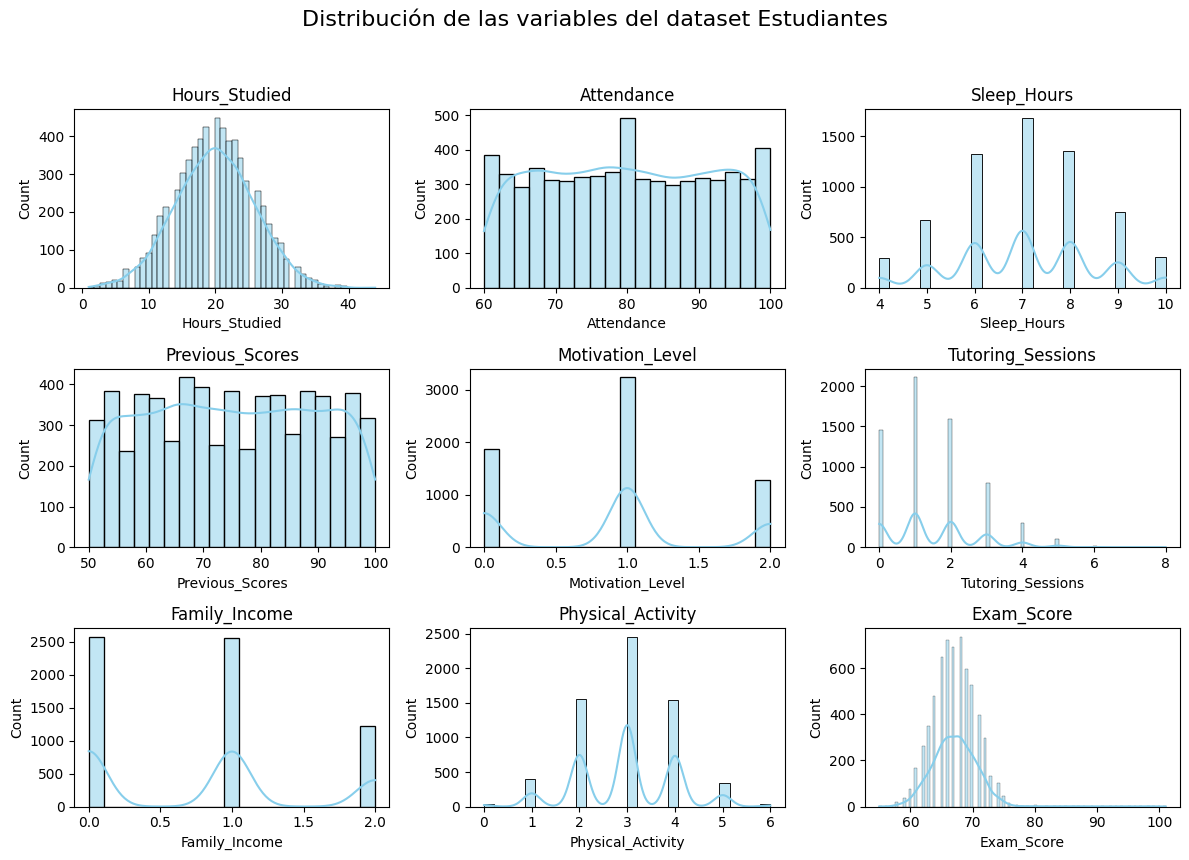

In [19]:
# Lista de variables numéricas que tiene sentido escalar
numeric_columns2 = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores",
    "Motivation_Level",
    "Tutoring_Sessions",
    "Family_Income",
    "Physical_Activity",
    "Exam_Score"
]

# Función para graficar distribuciones
def dist_custom(df, columns_list, rows, cols, suptitle='Distribuciones'):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    fig.suptitle(suptitle, fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(columns_list):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'{col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Eliminar subplots vacíos

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamamos a la función
dist_custom(dfstudent, columns_list=numeric_columns2, rows=3, cols=3, suptitle='Distribución de las variables del dataset Estudiantes')

### Concluisones para el escalado
| Variable             | Escalado        | Justificación                                              |
|----------------------|-----------------|------------------------------------------------------------|
| Hours_Studied        | StandardScaler  | Distribución aproximadamente normal.                      |
| Attendance           | MinMaxScaler    | Rango definido (60-100), distribución relativamente uniforme. |
| Sleep_Hours          | No escalar      | Distribución discreta con pocos valores únicos.           |
| Previous_Scores      | MinMaxScaler    | Distribución casi uniforme en rango limitado (50-100).    |
| Motivation_Level     | No escalar      | Variable ordinal discreta, ya está codificada (0-2).      |
| Tutoring_Sessions    | RobustScaler    | Valores atípicos, sesgo a la derecha (asimetría positiva).|
| Family_Income        | No escalar      | Ya es ordinal con pocos valores (0-2).                    |
| Physical_Activity    | No escalar      | Pocos valores únicos, distribución discreta.              |
| Exam_Score (target)  | No escalar      | Variable objetivo.                                        |

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Variables a escalar según el análisis
standard_cols = ["Hours_Studied"]
minmax_cols = ["Attendance", "Previous_Scores"]
robust_cols = ["Tutoring_Sessions"]

# Creamos el nuevo dataframe escalado
dfestudiantes_escalao = dfstudent.copy()

# Aplicamos escalado StandardScaler
scaler_standard = StandardScaler()
dfestudiantes_escalao[standard_cols] = scaler_standard.fit_transform(dfestudiantes_escalao[standard_cols])

# Aplicamos escalado MinMaxScaler
scaler_minmax = MinMaxScaler()
dfestudiantes_escalao[minmax_cols] = scaler_minmax.fit_transform(dfestudiantes_escalao[minmax_cols])

# Aplicamos escalado RobustScaler
scaler_robust = RobustScaler()
dfestudiantes_escalao[robust_cols] = scaler_robust.fit_transform(dfestudiantes_escalao[robust_cols])

# Verificamos resultados
dfestudiantes_escalao[standard_cols + minmax_cols + robust_cols].describe()
# Comprobamos si hay valores nulos
dfestudiantes_escalao.isnull().sum()

Hours_Studied                     0
Attendance                        0
Parental_Involvement              0
Sleep_Hours                       0
Previous_Scores                   0
Motivation_Level                  0
Tutoring_Sessions                 0
Family_Income                     0
Teacher_Quality                   0
Physical_Activity                 0
Parental_Education_Level          0
Distance_from_Home                0
Exam_Score                        0
Access_to_Resources_Low           0
Access_to_Resources_Medium        0
Extracurricular_Activities_Yes    0
Internet_Access_Yes               0
School_Type_Public                0
Peer_Influence_Neutral            0
Peer_Influence_Positive           0
Learning_Disabilities_Yes         0
Gender_Male                       0
dtype: int64

## 2. Regresión de Ridge

La **regresión Ridge** es una técnica de regresión que busca minimizar la **suma del error cuadrático** mientras penaliza los coeficientes del modelo para evitar el sobreajuste. A diferencia de la regresión lineal estándar, que solo intenta minimizar el error cuadrático medio (MSE), la regresión Ridge introduce un término de regularización que reduce la magnitud de los coeficientes.

### Fórmula Matemática

La fórmula que minimiza la regresión Ridge es:

$$
\hat{\beta} = \arg \min_{\beta} \left[ \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \beta)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 \right]
$$

Donde:

- \( y_i \): Es el valor observado de la variable dependiente para la \( i \)-ésima observación.
- \( \mathbf{x}_i \): Es el vector de características para la \( i \)-ésima observación.
- \( \beta \): Es el vector de coeficientes del modelo.
- \( \alpha \): Es el parámetro de regularización.
- \( n \): Es el número de observaciones en los datos.
- \( p \): Es el número de características del modelo.

### Explicación

La regresión Ridge agrega un **término de penalización** (\( \alpha \sum_{j=1}^{p} \beta_j^2 \)) a la función de pérdida de la regresión lineal. Este término penaliza la magnitud de los coeficientes \( \beta \), evitando el sobreajuste.

El parámetro \( \alpha \) es clave:
- Un \( \alpha \) bajo implica regularización débil (similar a regresión lineal ordinaria).
- Un \( \alpha \) alto aumenta la regularización, simplificando el modelo.

**Resumen**: Ridge es útil para manejar **multicolinealidad** o cuando se quiere evitar coeficientes demasiado grandes.

In [21]:
def train_ridge(X, y, test_size=0.2, random_state=42):

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar modelo Ridge con valores por defecto
    ridge = Ridge()
    ridge.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = ridge.predict(X_test)

    return ridge, X_train, X_test, y_train, y_test, y_pred

In [22]:
print("Rendimiento del modelo Ridge para el dataset de Boston")
# CASAS BOSTON
# Entrenar el modelo y obtener datos
ridge_model, X_train, X_test, y_train, y_test, y_pred = train_ridge(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])

# Evaluar con las métricas principales
Reg_Models_Evaluation_Metrics(ridge_model, X_train, y_train, X_test, y_test, y_pred)

# Evaluar con métricas adicionales
Metricas_Adicionales(y_test, y_pred)

print("-----------------------------")
print("Rendimiento del modelo Ridge para el dataset de estudiantes")

# RENDIMIENTO ALUMNOS
# Entrenar el modelo y obtener datos
ridge_model, X_train, X_test, y_train, y_test, y_pred = train_ridge(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'])

# Evaluar con las métricas principales
Reg_Models_Evaluation_Metrics(ridge_model, X_train, y_train, X_test, y_test, y_pred)

# Evaluar con métricas adicionales
Metricas_Adicionales(y_test, y_pred)

Rendimiento del modelo Ridge para el dataset de Boston
MAE: 3.1902
MSE: 24.4555
RMSE: 4.9453
R2: 0.6665
R2 AJUSTADO: 0.6173
VC: 0.6992
MBD: -0.2464
EVS: 0.6673
-----------------------------
Rendimiento del modelo Ridge para el dataset de estudiantes
MAE: 0.4815
MSE: 4.158
RMSE: 2.0391
R2: 0.7324
R2 AJUSTADO: 0.7279
VC: 0.7249
MBD: 0.0217
EVS: 0.7325


(np.float64(0.02167598043959408), 0.7324540070343787)

## 2.1 Regresión de Ridge CON HIPERPARÁMETROS
### Vamos a usar los hiperparámetros alpha y solver:
### **alpha**: Parámetro que controla cuánto "castigo" se le da al modelo para evitar que se ajuste demasiado a los datos. Un alpha alto hace que el modelo sea más estricto, y un alpha bajo le da más libertad. 
### Se usa: 
* Alpha alto: Si tienes datos ruidosos o el modelo se sobreajusta (funciona bien en entrenamiento pero mal en prueba).
* Alpha bajo: Si tus datos son limpios y quieres que el modelo se ajuste más libremente.

### **solver**: Algoritmo que se usa para entrenar el modelo. Algunos son más rápidos o más adecuados para distintos tipos de datos.
### Se usa: 
* auto: El modelo elige el mejor solver automáticamente.
* svd: Útil cuando tienes muchas características (columnas) y quieres velocidad.
* cholesky: Bueno para modelos pequeños y matrices sin problemas.
* lsqr: Ideal para datos dispersos (muchos ceros) o cuando tienes pocos recursos.

In [23]:
def train_ridge_hiper(X, y, alpha=1.0, solver='auto', test_size=0.2, random_state=42):
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar modelo Ridge con los hiperparámetros proporcionados
    ridge = Ridge(alpha=alpha, solver=solver)
    ridge.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = ridge.predict(X_test)

    return ridge, X_train, X_test, y_train, y_test, y_pred

# Hiperparámetros a probar
alpha_values = [0.1, 1.0, 10.0]  # Valores de alpha
solver_values = ['auto', 'svd', 'lsqr']  # Valores de solver

print("Rendimiento del modelo Ridge para el dataset de Boston")

# Probar combinaciones de hiperparámetros para el dataset de Boston Housing
for alpha in alpha_values:
    for solver in solver_values:
        print(f"Entrenando con alpha={alpha} y solver={solver} para el dataset de Boston Housing...")
        ridge_model, X_train, X_test, y_train, y_test, y_pred = train_ridge_hiper(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'], alpha=alpha, solver=solver)
        
        # Evaluar con las métricas principales
        Reg_Models_Evaluation_Metrics(ridge_model, X_train, y_train, X_test, y_test, y_pred)

        # Evaluar con métricas adicionales
        Metricas_Adicionales(y_test, y_pred)

        print("-----------------------------")

print("Rendimiento del modelo Ridge para el dataset de estudiantes")

# Probar combinaciones de hiperparámetros para el dataset de estudiantes
for alpha in alpha_values:
    for solver in solver_values:
        print(f"Entrenando con alpha={alpha} y solver={solver} para el dataset de estudiantes...")
        ridge_model, X_train, X_test, y_train, y_test, y_pred = train_ridge_hiper(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'], alpha=alpha, solver=solver)
        
        # Evaluar con las métricas principales
        Reg_Models_Evaluation_Metrics(ridge_model, X_train, y_train, X_test, y_test, y_pred)

        # Evaluar con métricas adicionales
        Metricas_Adicionales(y_test, y_pred)

        print("-----------------------------")

Rendimiento del modelo Ridge para el dataset de Boston
Entrenando con alpha=0.1 y solver=auto para el dataset de Boston Housing...
MAE: 3.1889
MSE: 24.3091
RMSE: 4.9304
R2: 0.6685
R2 AJUSTADO: 0.6195
VC: 0.6988
MBD: -0.237
EVS: 0.6693
-----------------------------
Entrenando con alpha=0.1 y solver=svd para el dataset de Boston Housing...
MAE: 3.1889
MSE: 24.3091
RMSE: 4.9304
R2: 0.6685
R2 AJUSTADO: 0.6195
VC: 0.6988
MBD: -0.237
EVS: 0.6693
-----------------------------
Entrenando con alpha=0.1 y solver=lsqr para el dataset de Boston Housing...
MAE: 3.1889
MSE: 24.3091
RMSE: 4.9304
R2: 0.6685
R2 AJUSTADO: 0.6195
VC: 0.6988
MBD: -0.237
EVS: 0.6693
-----------------------------
Entrenando con alpha=1.0 y solver=auto para el dataset de Boston Housing...
MAE: 3.1902
MSE: 24.4555
RMSE: 4.9453
R2: 0.6665
R2 AJUSTADO: 0.6173
VC: 0.6992
MBD: -0.2464
EVS: 0.6673
-----------------------------
Entrenando con alpha=1.0 y solver=svd para el dataset de Boston Housing...
MAE: 3.1902
MSE: 24.4555
RMSE:

## 2.2 Comparación SIN Hiperparámetros VS CON Hiperparámetros

### Sin Hiperparámetros
| **Métrica**               | **Valor Boston Housing** | **Valor Estudiantes** |
|---------------------------|--------------------------|-----------------------|
| **MAE**                   | 3.1902                   | **0.4815**            |
| **MSE**                   | 24.4555                  | **4.158**             |
| **RMSE**                  | 4.9453                   | **2.0391**            |
| **R2**                    | **0.6665**               | 0.7324                |
| **R2 Ajustado**           | **0.6173**               | 0.7279                |
| **Validación Cruzada (VC)** | **0.6992**             | 0.7249                |
| **MBD**                   | -0.2464                  | **0.0217**            |
| **EVS**                   | **0.6673**               | 0.7325                |

### Mejores resultados Hiperparámetros (alpha=0.1, solver=auto/svd/lsqr), dan los mismos resultados los solvers para alpha = 0.1

| **Métrica**               | **Boston Housing** | **Estudiantes** |
|---------------------------|--------------------|-----------------|
| **Alpha / Solver**        | 0.1 / auto         | 0.1 / auto      |
| **MAE**                   | 3.1889             | 0.4812          |
| **MSE**                   | 24.3091            | 4.1578          |
| **RMSE**                  | 4.9304             | 2.0391          |
| **R2**                    | 0.6685             | 0.7324          |
| **R2 Ajustado**           | 0.6195             | 0.7280          |
| **Validación Cruzada (VC)** | 0.6988           | 0.7249          |
| **MBD**                   | -0.237             | 0.0217          |
| **EVS**                   | 0.6693             | 0.7325          |

### Ajustar el hiperparámetro alpha=0.1 mejora levemente el rendimiento en Boston Housing (mejor R², menor error), mientras que en el dataset de Estudiantes el cambio es prácticamente insignificante. Esto sugiere que Ridge necesita más regularización en datasets con mayor complejidad y ruido.

## 3. ElasticNet

ElasticNet es una técnica de regularización que combina los términos de regularización de **Ridge** y **Lasso**. Es útil cuando tenemos muchas características correlacionadas, ya que puede hacer tanto selección de características como reducir la magnitud de los coeficientes.

La fórmula que minimiza ElasticNet es:

$$
\hat{\beta} = \arg \min_{\beta} \left[ \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \beta)^2 + \alpha \left( \rho \sum_{j=1}^{p} \beta_j^2 + \frac{1-\rho}{2} \sum_{j=1}^{p} |\beta_j| \right) \right]
$$

Donde:

- \( y_i \): Es el valor observado de la variable dependiente para la \( i \)-ésima observación.
- \( \mathbf{x}_i \): Es el vector de características para la \( i \)-ésima observación.
- \( \beta \): Es el vector de coeficientes del modelo.
- \( \alpha \): Es el parámetro de regularización, que controla la cantidad de penalización aplicada a los coeficientes.
- \( \rho \): Controla el balance entre **Lasso** (cuando \( \rho = 0 \)) y **Ridge** (cuando \( \rho = 1 \)).
- \( n \): Es el número de observaciones en los datos.
- \( p \): Es el número de características del modelo.

### Explicación

ElasticNet combina lo mejor de **Lasso** y **Ridge**:

1. El término \( \frac{1-\rho}{2} \sum_{j=1}^{p} |\beta_j| \) es el **término Lasso**, que realiza la selección de características y puede hacer que algunos coeficientes sean cero.
2. El término \( \rho \sum_{j=1}^{p} \beta_j^2 \) es el **término Ridge**, que reduce la magnitud de los coeficientes sin descartarlos.

Al ajustar los parámetros \( \alpha \) y \( \rho \), ElasticNet ofrece un control detallado sobre el balance entre la **selección de características** y la **regularización**.

### ¿Por qué usar ElasticNet?

- Es ideal cuando tienes **muchas características correlacionadas**.
- Es útil cuando el número de características es **mucho mayor que el número de observaciones**.
- Te da más flexibilidad que solo usar **Ridge** o **Lasso** por separado.
- **ElasticNet** ayuda bastante con la regularización que mejora la precisión del modelo, especialmente cuando las variables tienen mucha correlación.

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

def train_elasticnet(X, y, test_size=0.2, random_state=42):
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar modelo ElasticNet con valores por defecto
    elastic = ElasticNet()
    elastic.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = elastic.predict(X_test)

    return elastic, X_train, X_test, y_train, y_test, y_pred

In [25]:
print("Rendimiento del modelo ElasticNet para el dataset de Boston")

# CASAS BOSTON
elastic_model, X_train, X_test, y_train, y_test, y_pred = train_elasticnet(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])
Reg_Models_Evaluation_Metrics(elastic_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

print("-----------------------------")
print("Rendimiento del modelo ElasticNet para el dataset de estudiantes")

# ESTUDIANTES
elastic_model, X_train, X_test, y_train, y_test, y_pred = train_elasticnet(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'])
Reg_Models_Evaluation_Metrics(elastic_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

Rendimiento del modelo ElasticNet para el dataset de Boston
MAE: 3.5643
MSE: 28.7921
RMSE: 5.3658
R2: 0.6074
R2 AJUSTADO: 0.5494
VC: 0.6176
MBD: 0.0188
EVS: 0.6074
-----------------------------
Rendimiento del modelo ElasticNet para el dataset de estudiantes
MAE: 2.5696
MSE: 12.7634
RMSE: 3.5726
R2: 0.1786
R2 AJUSTADO: 0.1649
VC: 0.1751
MBD: -0.0127
EVS: 0.1786


(np.float64(-0.012683603564077606), 0.1786482788603042)

### 3.1 ElesticNet con Hiperparámetros
### Vamos a usar los hiperparámetros alpha y l1_ratio:

### **alpha**: Controla la regularización del modelo. Es un parámetro que ajusta la cantidad de "castigo" que se aplica al modelo para evitar el sobreajuste. 
### Se usa:
* **Alpha bajo** (por ejemplo, 0.1): Permite que el modelo se ajuste más libremente a los datos, útil si se tiene confianza en los datos y no hay mucho ruido.
* **Alpha alto** (por ejemplo, 10.0): Impondrá más regularización, útil cuando se tiene mucho ruido en los datos o si el modelo tiende a sobreajustarse.

### **l1_ratio**: Controla el equilibrio entre la regularización Lasso (L1) y Ridge (L2). Cuando l1_ratio = 1, el modelo es completamente Lasso, y cuando l1_ratio = 0, es completamente Ridge. Un valor intermedio balancea ambos métodos.
### Se usa:
* **L1_ratio bajo** (por ejemplo, 0.2): Más regularización Ridge, útil cuando se desea que el modelo mantenga muchos coeficientes pequeños pero no los elimine.
* **L1_ratio alto** (por ejemplo, 0.8 o 1.0): Más regularización Lasso, que favorece coeficientes más esparsos, ideal si se espera que solo unas pocas características sean relevantes.

In [26]:
# Función de entrenamiento para ElasticNet con hiperparámetros
def train_elasticnet_hiper(X, y, alpha=1.0, l1_ratio=0.5, test_size=0.2, random_state=42):
    # Dividir el dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar el modelo ElasticNet con los hiperparámetros
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    model.fit(X_train, y_train)

    # Realizar las predicciones
    y_pred = model.predict(X_test)

    return model, X_train, X_test, y_train, y_test, y_pred

# Definir los valores de alpha y l1_ratio a probar
alphas = [0.1, 1.0, 10.0]
l1_ratios = [0.2, 0.5, 0.8]

print("Rendimiento ElasticNet para el dataset de Boston")
for alpha in alphas:
    for l1_ratio in l1_ratios:
        print(f"\nEntrenando con alpha={alpha} y l1_ratio={l1_ratio}...")

        # Entrenamiento y evaluación para el dataset de Boston
        model, X_train, X_test, y_train, y_test, y_pred = train_elasticnet_hiper(
            dfhousing_escalao.drop(columns=['medv']),
            dfhousing_escalao['medv'],
            alpha=alpha,
            l1_ratio=l1_ratio
        )

        # Evaluar las métricas
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)

# Repetir para el dataset de estudiantes
print("\nRendimiento ElasticNet para el dataset de Estudiantes")
for alpha in alphas:
    for l1_ratio in l1_ratios:
        print(f"\nEntrenando con alpha={alpha} y l1_ratio={l1_ratio}...")

        # Entrenamiento y evaluación para el dataset de Estudiantes
        model, X_train, X_test, y_train, y_test, y_pred = train_elasticnet_hiper(
            dfestudiantes_escalao.drop(columns=['Exam_Score']),
            dfestudiantes_escalao['Exam_Score'],
            alpha=alpha,
            l1_ratio=l1_ratio
        )

        # Evaluar las métricas
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)

Rendimiento ElasticNet para el dataset de Boston

Entrenando con alpha=0.1 y l1_ratio=0.2...
MAE: 3.205
MSE: 25.6134
RMSE: 5.061
R2: 0.6507
R2 AJUSTADO: 0.5991
VC: 0.6894
MBD: -0.3197
EVS: 0.6521
----------------------------------------

Entrenando con alpha=0.1 y l1_ratio=0.5...
MAE: 3.2324
MSE: 25.868
RMSE: 5.0861
R2: 0.6473
R2 AJUSTADO: 0.5951
VC: 0.6899
MBD: -0.3251
EVS: 0.6487
----------------------------------------

Entrenando con alpha=0.1 y l1_ratio=0.8...
MAE: 3.2656
MSE: 26.1997
RMSE: 5.1186
R2: 0.6427
R2 AJUSTADO: 0.59
VC: 0.6903
MBD: -0.3322
EVS: 0.6442
----------------------------------------

Entrenando con alpha=1.0 y l1_ratio=0.2...
MAE: 3.558
MSE: 29.0235
RMSE: 5.3873
R2: 0.6042
R2 AJUSTADO: 0.5458
VC: 0.6066
MBD: 0.1027
EVS: 0.6044
----------------------------------------

Entrenando con alpha=1.0 y l1_ratio=0.5...
MAE: 3.5643
MSE: 28.7921
RMSE: 5.3658
R2: 0.6074
R2 AJUSTADO: 0.5494
VC: 0.6176
MBD: 0.0188
EVS: 0.6074
----------------------------------------

Entrenan

### 3.2 Comparación SIN Hiperparámetros VS CON Hiperparámetros

### hay que destacar que para valores altos de alpha y en ambos dataset se ve un rendimiento muy bajo, con uyn R2 muy negativo alto Mae y alto RMSE, esto es normal ya que un valor muy alto de alpha aumenta el "castigo" sobre los coeficientes, lo que puede llevar a un modelo muy sesgado (subajustado), incapaz de aprender de los datos correctamente.

### ElasticNet sin hiperparámetros
| **Métrica**               | **Valor Boston Housing** | **Valor Estudiantes** |
|---------------------------|--------------------------|-----------------------|
| **MAE**                   | 3.5643                   | 2.5696                |
| **MSE**                   | 28.7921                  | 12.7634               |
| **RMSE**                  | 5.3658                   | 3.5726                |
| **R2**                    | 0.6074                   | 0.1786                |
| **R2 Ajustado**           | 0.5494                   | 0.1649                |
| **Validación Cruzada (VC)** | 0.6176                 | 0.1751                |
| **MBD**                   | 0.0188                   | -0.0127               |
| **EVS**                   | 0.6074                   | 0.1786                |

### Mejor rendimiento ElasticNet con Hiperparámetros:

| **Métrica**               | **Boston Housing (alpha=0.1, l1_ratio=0.2)** | **Estudiantes (alpha=0.1, l1_ratio=0.8)** |
|---------------------------|---------------------------------------------|----------------------------------------|
| **MAE**                   | 3.205                                       | 1.0951                                 |
| **MSE**                   | 25.6134                                     | 5.292                                  |
| **RMSE**                  | 5.061                                       | 2.3004                                 |
| **R²**                    | 0.6507                                      | 0.6594                                 |
| **R² Ajustado**           | 0.5991                                      | 0.6537                                 |
| **Validación Cruzada (VC)** | 0.6894                                      | 0.6507                                 |
| **MBD**                   | -0.3197                                     | 0.0185                                 |
| **EVS**                   | 0.6521                                      | 0.6595                                 |

### Usar alpha=0.1 mejora un poco el rendimiento en Boston Housing, ya que reduce los errores y aumenta el R². En el caso de Estudiantes, el rendimiento es mejor con l1_ratio=0.8, pero los cambios no son tan grandes. Esto muestra que Boston Housing necesita algo más de regularización, mientras que Estudiantes no la requiere tanto.

## 4. Regresión Bayesiana

La **regresión bayesiana** es un enfoque probabilístico que utiliza la teoría de probabilidades de Bayes para estimar los coeficientes del modelo. En lugar de obtener un solo valor para los coeficientes, obtenemos una distribución sobre ellos.

### Fórmula Matemática

La fórmula de la regresión bayesiana es:

$$
p(\beta | X, y) = \frac{p(y | X, \beta) p(\beta)}{p(y | X)}
$$

Donde:

- \( p(\beta | X, y) \): Es la distribución posterior de los coeficientes \( \beta \) dada la matriz de características \( X \) y las respuestas \( y \).
- \( p(y | X, \beta) \): Es la verosimilitud del modelo, que describe cómo los datos se generan a partir de \( X \) y \( \beta \).
- \( p(\beta) \): Es el prior de los coeficientes \( \beta \), que refleja nuestra creencia sobre los coeficientes antes de observar los datos.
- \( p(y | X) \): Es la probabilidad marginal de los datos.

### Explicación

- **Prior**: La distribución previa de \( \beta \), que refleja lo que creemos antes de observar los datos.
- **Verosimilitud**: La distribución de \( y \) dada \( X \) y \( \beta \), que describe cómo los datos se generan.
- **Posterior**: La distribución de \( \beta \) después de observar los datos, que es calculada usando el teorema de Bayes.

En resumen, la regresión bayesiana nos da una distribución completa sobre los coeficientes \( \beta \), lo que nos permite entender la **incertidumbre** sobre ellos.

### ¿Por qué usar Regresión Bayesiana?

- Nos da una distribución completa sobre los parámetros del modelo.
- Es útil para situaciones con **pocos datos** o donde la **incertidumbre** es importante.
- La **regularización** natural evita el sobreajuste.

In [27]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

def train_bayesian(X, y, test_size=0.2, random_state=42):
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Crear y entrenar el modelo
    bayesian = BayesianRidge()
    bayesian.fit(X_train, y_train)

    # Predecir
    y_pred = bayesian.predict(X_test)

    return bayesian, X_train, X_test, y_train, y_test, y_pred

print("Rendimiento del modelo Bayesian Ridge para el dataset de Boston")
bayes_model, X_train, X_test, y_train, y_test, y_pred = train_bayesian(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])
Reg_Models_Evaluation_Metrics(bayes_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

print("-----------------------------")
print("Rendimiento del modelo Bayesian Ridge para el dataset de estudiantes")
bayes_model, X_train, X_test, y_train, y_test, y_pred = train_bayesian(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'])
Reg_Models_Evaluation_Metrics(bayes_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

Rendimiento del modelo Bayesian Ridge para el dataset de Boston
MAE: 3.1894
MSE: 24.6762
RMSE: 4.9675
R2: 0.6635
R2 AJUSTADO: 0.6138
VC: 0.6989
MBD: -0.2616
EVS: 0.6644
-----------------------------
Rendimiento del modelo Bayesian Ridge para el dataset de estudiantes
MAE: 0.4816
MSE: 4.158
RMSE: 2.0391
R2: 0.7324
R2 AJUSTADO: 0.7279
VC: 0.7249
MBD: 0.0217
EVS: 0.7325


(np.float64(0.02167468822548031), 0.7324529687988612)

### 4.1 Regresión Bayesiana con Hiperparámetros
### Vamos a usar los hiperparámetros alpha_1 y lambda_1:

### **alpha_1**: Controla la magnitud de la regularización del modelo. En términos simples, define el "castigo" que se le da a los coeficientes del modelo para que no se ajusten demasiado a los datos, lo que ayuda a evitar el sobreajuste.
### Se usa:
* **Alpha_1 bajo** (por ejemplo, 1e-10): El modelo tiene más flexibilidad para ajustarse a los datos, ideal cuando se tiene confianza en la calidad de los datos y no hay mucho ruido.
* **Alpha_1 alto** (por ejemplo, 1e-2 o 1): El modelo está más regularizado, lo que es útil si tienes datos ruidosos o si el modelo tiende a sobreajustarse.

### **lambda_1**: Similar a alpha_1, lambda_1 controla la regularización en el modelo, pero de una manera que afecta el ajuste del modelo a los datos. Su función principal es ayudar a reducir la complejidad del modelo, limitando la influencia de los coeficientes.
### Se usa:
* **Lambda_1 bajo** (por ejemplo, 1e-10): Permite que el modelo se ajuste más libremente a los datos, lo que puede ser útil si tienes datos muy limpios o poco ruido.
* **Lambda_1 alto** (por ejemplo, 1e-2 o 1): Imponen un mayor "castigo" sobre los coeficientes, lo que es útil si el modelo está sobreajustándose o si tienes muchos datos ruidosos.

In [28]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# Función de entrenamiento para Bayesian Ridge con hiperparámetros
def train_bayesianridge_hiper(X, y, alpha_1=1e-6, lambda_1=1e-6, test_size=0.2, random_state=42):
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar modelo con los hiperparámetros indicados
    model = BayesianRidge(alpha_1=alpha_1, lambda_1=lambda_1)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    return model, X_train, X_test, y_train, y_test, y_pred

In [29]:
# Parámetros a probar
alpha_1_values = [1e-10, 1e-5, 1e-2, 1]
lambda_1_values = [1e-10, 1e-5, 1e-2, 1]

print("Bayesian Ridge - Dataset Boston")
for a1 in alpha_1_values:
    for l1 in lambda_1_values:
        print(f"\nalpha_1={a1}, lambda_1={l1}")
        model, X_train, X_test, y_train, y_test, y_pred = train_bayesianridge_hiper(
            dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'],
            alpha_1=a1, lambda_1=l1
        )
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)

print("\nBayesian Ridge - Dataset Estudiantes")
for a1 in alpha_1_values:
    for l1 in lambda_1_values:
        print(f"\nalpha_1={a1}, lambda_1={l1}")
        model, X_train, X_test, y_train, y_test, y_pred = train_bayesianridge_hiper(
            dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'],
            alpha_1=a1, lambda_1=l1
        )
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)


Bayesian Ridge - Dataset Boston

alpha_1=1e-10, lambda_1=1e-10
MAE: 3.1894
MSE: 24.6762
RMSE: 4.9675
R2: 0.6635
R2 AJUSTADO: 0.6138
VC: 0.6989
MBD: -0.2616
EVS: 0.6644
----------------------------------------

alpha_1=1e-10, lambda_1=1e-05
MAE: 3.1894
MSE: 24.6762
RMSE: 4.9675
R2: 0.6635
R2 AJUSTADO: 0.6138
VC: 0.6989
MBD: -0.2616
EVS: 0.6644
----------------------------------------

alpha_1=1e-10, lambda_1=0.01
MAE: 3.1894
MSE: 24.6768
RMSE: 4.9676
R2: 0.6635
R2 AJUSTADO: 0.6138
VC: 0.6989
MBD: -0.2617
EVS: 0.6644
----------------------------------------

alpha_1=1e-10, lambda_1=1
MAE: 3.1891
MSE: 24.7309
RMSE: 4.973
R2: 0.6628
R2 AJUSTADO: 0.6129
VC: 0.6988
MBD: -0.2658
EVS: 0.6637
----------------------------------------

alpha_1=1e-05, lambda_1=1e-10
MAE: 3.1894
MSE: 24.6762
RMSE: 4.9675
R2: 0.6635
R2 AJUSTADO: 0.6138
VC: 0.6989
MBD: -0.2616
EVS: 0.6644
----------------------------------------

alpha_1=1e-05, lambda_1=1e-05
MAE: 3.1894
MSE: 24.6762
RMSE: 4.9675
R2: 0.6635
R2 AJUSTA

### 4.3 Comparación SIN Hiperparámetros VS CON Hiperparámetros

### Bayesian Ridge sin hiperparámetros
| **Métrica**                 | **Valor Boston Housing** | **Valor Estudiantes** |
|----------------------------|--------------------------|------------------------|
| **MAE**                    | 3.1894                   | 0.4816                 |
| **MSE**                    | 24.6762                  | 4.158                  |
| **RMSE**                   | 4.9675                   | 2.0391                 |
| **R2**                     | 0.6635                   | 0.7324                 |
| **R2 Ajustado**            | 0.6138                   | 0.7279                 |
| **Validación Cruzada (VC)**| 0.6989                   | 0.7249                 |
| **MBD**                    | -0.2616                  | 0.0217                 |
| **EVS**                    | 0.6644                   | 0.7325                 |

### Bayesian Ridge con hiperparámetros (`alpha_1=1e-10`, `lambda_1=1e-10`)
| **Métrica**                 | **Valor Boston Housing** | **Valor Estudiantes** |
|-----------------------------|--------------------------|------------------------|
| **MAE**                     | 3.1894                   | 0.4816                 |
| **MSE**                     | 24.6762                  | 4.158                  |
| **RMSE**                    | 4.9675                   | 2.0391                 |
| **R²**                      | 0.6635                   | 0.7324                 |
| **R² Ajustado**             | 0.6138                   | 0.7279                 |
| **Validación Cruzada (VC)**| 0.6989                   | 0.7249                 |
| **MBD**                     | -0.2616                  | 0.0217                 |
| **EVS**                     | 0.6644                   | 0.7325                 |

### En este caso no vemos ningun cambio, esto puede ser porque el modelo ya esté bien optimizado y esté dando por defecto los mejores resultados, vemos que comparándolos con los otros dos algoritmos anteriores, tenemos buenos resultados por lo que al probar estos hiperparámetros no hemos notado esa mejoría.
### Como predeterminado estos dos hiperparámetros están en 1e-6 y 1e-6 respectivamente.

## 5. Regresión Lasso

La **regresión Lasso** es una técnica de regresión que utiliza una penalización L1 sobre los coeficientes del modelo. Esta penalización no solo reduce los coeficientes, sino que también puede hacer que algunos coeficientes sean exactamente cero, lo que lleva a una selección automática de características.

### Fórmula Matemática

La fórmula de la regresión Lasso es:

$$
\hat{\beta} = \arg \min_{\beta} \left[ \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right]
$$

Donde:

- \( y_i \): Es el valor observado de la variable dependiente para la \( i \)-ésima observación.
- \( \mathbf{x}_i \): Es el vector de características para la \( i \)-ésima observación.
- \( \beta \): Es el vector de coeficientes del modelo.
- \( \alpha \): Es el parámetro de regularización que controla la fuerza de la penalización.
- \( n \): Es el número de observaciones.
- \( p \): Es el número de características del modelo.

### Explicación

- **Penalización L1**: La penalización \( \alpha \sum_{j=1}^{p} |\beta_j| \) obliga a que algunos coeficientes \( \beta_j \) se vuelvan exactamente cero, lo que lleva a la **selección de características**.
- **Parámetro \( \alpha \)**: Controla la cantidad de regularización aplicada. Si \( \alpha \) es pequeño, el modelo se parecerá más a la regresión lineal estándar, mientras que si \( \alpha \) es grande, la penalización será fuerte y muchos coeficientes serán reducidos a cero.

### ¿Por qué usar Lasso?

- **Selección de características automática**: Lasso realiza automáticamente la selección de características eliminando aquellas que no son relevantes.
- **Regularización**: Al aplicar una penalización L1, Lasso ayuda a evitar el sobreajuste al reducir los coeficientes no relevantes.

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Función de entrenamiento para Lasso sin hiperparámetros
def train_lasso(X, y, test_size=0.2, random_state=42):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Crear y entrenar el modelo Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)

    # Realizar las predicciones
    y_pred = lasso.predict(X_test)

    return lasso, X_train, X_test, y_train, y_test, y_pred

# Entrenamiento y evaluación para el dataset de Boston
print("Rendimiento del modelo Lasso para el dataset de Boston")
lasso_model, X_train, X_test, y_train, y_test, y_pred = train_lasso(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])
Reg_Models_Evaluation_Metrics(lasso_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

print("-----------------------------")

# Entrenamiento y evaluación para el dataset de Estudiantes
print("Rendimiento del modelo Lasso para el dataset de Estudiantes")
lasso_model, X_train, X_test, y_train, y_test, y_pred = train_lasso(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'])
Reg_Models_Evaluation_Metrics(lasso_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

Rendimiento del modelo Lasso para el dataset de Boston
MAE: 3.5379
MSE: 28.1716
RMSE: 5.3077
R2: 0.6158
R2 AJUSTADO: 0.5591
VC: 0.6376
MBD: -0.1608
EVS: 0.6162
-----------------------------
Rendimiento del modelo Lasso para el dataset de Estudiantes
MAE: 2.6604
MSE: 13.4783
RMSE: 3.6713
R2: 0.1326
R2 AJUSTADO: 0.1181
VC: 0.1308
MBD: -0.0177
EVS: 0.1327


(np.float64(-0.017671713128628252), 0.13265136736223582)

### 5.1 Lasso con Hiperparámetros
### Vamos a usar los hiperparámetros **tol** y **max_iter**:

### **tol (tolerancia)**: Controla el criterio de convergencia del algoritmo. Determina cuándo el algoritmo considera que ha encontrado una solución adecuada. Si el valor de **tol** es pequeño, el algoritmo puede requerir más iteraciones para converger, pero el resultado final puede ser más preciso.
### Se usa:
* **Tol bajo** (por ejemplo, 1e-4): El modelo es más preciso, pero puede tardar más tiempo en converger. Útil cuando necesitas una solución ajustada.
* **Tol alto** (por ejemplo, 1e-2): El modelo puede converger más rápidamente, pero la solución puede ser menos precisa. Útil cuando el tiempo de entrenamiento es más importante que la precisión exacta.

### **max_iter (número máximo de iteraciones)**: Determina cuántas veces puede el algoritmo pasar por los datos durante el entrenamiento. Si el modelo no ha convergido antes de alcanzar este límite, se detendrá. Un valor mayor puede ayudar al modelo a converger mejor, especialmente con datos complejos.
### Se usa:
* **Max_iter bajo** (por ejemplo, 1000): Se usa cuando el modelo es simple o los datos convergen rápidamente.
* **Max_iter alto** (por ejemplo, 10000): Se usa cuando los datos son complejos o se necesita más tiempo para encontrar una solución óptima.

In [31]:
def train_lasso_hiper(X, y, tol=1e-4, max_iter=1000, test_size=0.2, random_state=42):
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Crear y entrenar el modelo Lasso
    lasso = Lasso(tol=tol, max_iter=max_iter)
    lasso.fit(X_train, y_train)

    # Predecir
    y_pred = lasso.predict(X_test)

    return lasso, X_train, X_test, y_train, y_test, y_pred

# Parámetros a probar
tol_values = [1e-4, 1e-2, 1e-1]
max_iter_values = [1000, 5000, 10000]

# Evaluación para el dataset de Boston
print("Lasso - Dataset Boston")
for tol in tol_values:
    for max_iter in max_iter_values:
        print(f"\ntol={tol}, max_iter={max_iter}")
        model, X_train, X_test, y_train, y_test, y_pred = train_lasso_hiper(
            dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'],
            tol=tol, max_iter=max_iter
        )
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)

# Evaluación para el dataset de Estudiantes
print("\nLasso - Dataset Estudiantes")
for tol in tol_values:
    for max_iter in max_iter_values:
        print(f"\ntol={tol}, max_iter={max_iter}")
        model, X_train, X_test, y_train, y_test, y_pred = train_lasso_hiper(
            dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'],
            tol=tol, max_iter=max_iter
        )
        Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred)
        Metricas_Adicionales(y_test, y_pred)
        print("-" * 40)

Lasso - Dataset Boston

tol=0.0001, max_iter=1000
MAE: 3.5379
MSE: 28.1716
RMSE: 5.3077
R2: 0.6158
R2 AJUSTADO: 0.5591
VC: 0.6376
MBD: -0.1608
EVS: 0.6162
----------------------------------------

tol=0.0001, max_iter=5000
MAE: 3.5379
MSE: 28.1716
RMSE: 5.3077
R2: 0.6158
R2 AJUSTADO: 0.5591
VC: 0.6376
MBD: -0.1608
EVS: 0.6162
----------------------------------------

tol=0.0001, max_iter=10000
MAE: 3.5379
MSE: 28.1716
RMSE: 5.3077
R2: 0.6158
R2 AJUSTADO: 0.5591
VC: 0.6376
MBD: -0.1608
EVS: 0.6162
----------------------------------------

tol=0.01, max_iter=1000
MAE: 3.5359
MSE: 28.1684
RMSE: 5.3074
R2: 0.6159
R2 AJUSTADO: 0.5591
VC: 0.6377
MBD: -0.1639
EVS: 0.6163
----------------------------------------

tol=0.01, max_iter=5000
MAE: 3.5359
MSE: 28.1684
RMSE: 5.3074
R2: 0.6159
R2 AJUSTADO: 0.5591
VC: 0.6377
MBD: -0.1639
EVS: 0.6163
----------------------------------------

tol=0.01, max_iter=10000
MAE: 3.5359
MSE: 28.1684
RMSE: 5.3074
R2: 0.6159
R2 AJUSTADO: 0.5591
VC: 0.6377
MBD: -0.1

### 5.2 Comparación SIN Hiperparámetros VS CON Hiperparámetros

### Lasso sin hiperparámetros

| **Métrica**                 | **Valor Boston Housing** | **Valor Estudiantes** |
|-----------------------------|--------------------------|------------------------|
| **MAE**                     | 3.5379                   | 2.6604                 |
| **MSE**                     | 28.1716                  | 13.4783                |
| **RMSE**                    | 5.3077                   | 3.6713                 |
| **R²**                      | 0.6158                   | 0.1326                 |
| **R² Ajustado**             | 0.5591                   | 0.1181                 |
| **Validación Cruzada (VC)**| 0.6376                   | 0.1308                 |
| **MBD**                     | -0.1608                  | -0.0177                |
| **EVS**                     | 0.6162                   | 0.1327                 |


### Lasso con hiperparámetros (tol=0.1, max_iter=10000)

| **Métrica**                 | **Valor Boston Housing** | **Valor Estudiantes** |
|-----------------------------|--------------------------|------------------------|
| **MAE**                     | 3.5216                   | 2.6604                 |
| **MSE**                     | 28.1867                  | 13.4783                |
| **RMSE**                    | 5.3091                   | 3.6713                 |
| **R²**                      | 0.6156                   | 0.1326                 |
| **R² Ajustado**             | 0.5589                   | 0.1181                 |
| **Validación Cruzada (VC)**| 0.6386                   | 0.1308                 |
| **MBD**                     | -0.1889                  | -0.0177                |
| **EVS**                     | 0.6161                   | 0.1327                   |

### podemos destacar que este modelo no se haya optimizado de la mejor forma, porque si nos fijamos en el que usamos el algoritmo bayesiano, tenemos una Validación Cruzada (VC) de  0.6989 para boston  y  0.7249 para los estudiantes, aqui tenemos 0.6386 y 0.1308 y además parece que para el dataset del rendimiento de los estudiantes, este algoritmo no funciona bien, es más al probar diferentes conbinaciones de hiperparámetros, no cambia los resultados.

## 6. Quantile Regression
### Este algoritmo no está en sklearn, podriamos usar la libreria statsmodels "!pip install statsmodels", pero también podemos usar HistGradientBoostingRegressor de scikit-learn HistGradientBoostingRegressor con la pérdida tipo cuantílica, que permite ajustar regresión cuantílica de forma directa y nativa.

La **regresión cuantil** es una técnica que busca estimar cualquier cuantil de la distribución condicional de la variable dependiente, en lugar de solo la media. Esto es útil cuando se desea modelar la dispersión de los datos o cuando se tienen valores atípicos.

### Fórmula Matemática

La fórmula de la regresión cuantil es:

$$
Q_\tau(y|X) = \mathbf{x}^T \beta_\tau
$$

Donde:

- \( Q_\tau(y|X) \): Es el cuantil \( \tau \)-ésimo de la variable dependiente \( y \) dado el conjunto de predictores \( X \).
- \( \mathbf{x} \): Es el vector de características de la \( i \)-ésima observación.
- \( \beta_\tau \): Es el vector de coeficientes específicos para el cuantil \( \tau \)-ésimo.
- \( \tau \): Es el cuantil deseado (por ejemplo, 0.5 para la mediana, 0.9 para el 90%).

### Explicación

La regresión cuantil estima **diferentes partes de la distribución de \( y \)** (como la mediana o los percentiles altos/bajos) en lugar de solo la media, y es robusta frente a valores atípicos.

### Pérdida de Regresión Cuantil

La pérdida asociada a la regresión cuantil es:

$$
L_\tau(y_i, \hat{y}_i) = \begin{cases}
\tau (y_i - \hat{y}_i) & \text{si } y_i \geq \hat{y}_i \\
(1-\tau) (\hat{y}_i - y_i) & \text{si } y_i < \hat{y}_i
\end{cases}
$$

### ¿Por qué usar Regresión Cuantil?

- **Estimar percentiles específicos** de la variable dependiente \( y \).
- **Robustez**: Más resistente a valores atípicos en comparación con la regresión lineal.
- **Flexibilidad**: Puede modelar la dispersión de \( y \) y no solo su centro.

In [32]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Función para entrenar Quantile Regression con sklearn
def train_quantile_sklearn(X, y, quantile=0.5, test_size=0.2, random_state=42):
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Crear y entrenar el modelo de regresión cuantílica
    quantile_model = HistGradientBoostingRegressor(loss='quantile', quantile=quantile, random_state=random_state)
    quantile_model.fit(X_train, y_train)

    # Predicciones
    y_pred = quantile_model.predict(X_test)

    return quantile_model, X_train, X_test, y_train, y_test, y_pred

print("Rendimiento del modelo Quantile Regression para el dataset de Boston")
quant_model, X_train, X_test, y_train, y_test, y_pred = train_quantile_sklearn(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])
Reg_Models_Evaluation_Metrics(quant_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

print("-----------------------------")

print("Rendimiento del modelo Quantile Regression para el dataset de Estudiantes")
quant_model, X_train, X_test, y_train, y_test, y_pred = train_quantile_sklearn(dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'])
Reg_Models_Evaluation_Metrics(quant_model, X_train, y_train, X_test, y_test, y_pred)
Metricas_Adicionales(y_test, y_pred)

Rendimiento del modelo Quantile Regression para el dataset de Boston


c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

MAE: 2.1417
MSE: 12.6002
RMSE: 3.5497
R2: 0.8282
R2 AJUSTADO: 0.8028
VC: 0.823
MBD: -0.4437
EVS: 0.8309
-----------------------------
Rendimiento del modelo Quantile Regression para el dataset de Estudiantes
MAE: 0.7025
MSE: 4.4981
RMSE: 2.1209
R2: 0.7105
R2 AJUSTADO: 0.7057
VC: 0.6979
MBD: -0.1628
EVS: 0.7122


(np.float64(-0.16279075405186505), 0.7122373328113305)

### 6.1 Quantile Regression con Hiperparámetros

### **alpha:** Controla el nivel de regularización L1 en el modelo. Un valor más alto implica una mayor penalización, lo que puede reducir el sobreajuste pero también incrementar el sesgo.

#### Uso:

* Bajo (por ejemplo, 0.01): El modelo se ajustará más a los datos, con menor regularización, pero mayor riesgo de sobreajuste.

* Alto (por ejemplo, 1.0): El modelo será más conservador, con mayor regularización y menor riesgo de sobreajuste, aunque podría perder precisión.

### **solver:** Determina el algoritmo utilizado para resolver el problema de optimización lineal. Diferentes solvers pueden afectar la velocidad y estabilidad del ajuste.

#### Uso:

* 'highs': Solver rápido y eficiente, recomendado como valor por defecto.

* 'highs-ds': Variante especializada del solver `highs`, útil en ciertos casos numéricos.

* 'interior-point': Más robusto en problemas complejos, aunque puede ser más lento.


In [33]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split

# Función de entrenamiento
def train_quantile_hiper(X, y, alpha=1.0, solver='highs', test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    quant_model = QuantileRegressor(alpha=alpha, solver=solver)
    quant_model.fit(X_train, y_train)
    y_pred = quant_model.predict(X_test)
    return quant_model, X_train, X_test, y_train, y_test, y_pred

# Función para evaluar múltiples combinaciones
def evaluar_modelo(dataset_nombre, X, y, alphas, solvers):
    print(f"\nQuantile Regression - Dataset {dataset_nombre}")
    for alpha in alphas:
        for solver in solvers:
            print(f"\nalpha={alpha}, solver='{solver}'")
            modelo, X_train, X_test, y_train, y_test, y_pred = train_quantile_hiper(X, y, alpha=alpha, solver=solver)
            Reg_Models_Evaluation_Metrics(modelo, X_train, y_train, X_test, y_test, y_pred)
            Metricas_Adicionales(y_test, y_pred)
            print("-" * 40)

# Parámetros
alpha_values = [0.01, 0.5, 1.0]
solver_values = ['highs-ipm']

# Evaluación en los dos datasets
evaluar_modelo("Estudiantes", dfestudiantes_escalao.drop(columns=['Exam_Score']), dfestudiantes_escalao['Exam_Score'], alpha_values, solver_values)
evaluar_modelo("Boston", dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'], alpha_values, solver_values)


Quantile Regression - Dataset Estudiantes

alpha=0.01, solver='highs-ipm'
MAE: 0.4465
MSE: 4.1669
RMSE: 2.0413
R2: 0.7318
R2 AJUSTADO: 0.7274
VC: 0.724
MBD: -0.1539
EVS: 0.7334
----------------------------------------

alpha=0.5, solver='highs-ipm'
MAE: 2.8981
MSE: 15.6129
RMSE: 3.9513
R2: -0.0047
R2 AJUSTADO: -0.0216
VC: -0.0048
MBD: -0.2712
EVS: 0.0
----------------------------------------

alpha=1.0, solver='highs-ipm'
MAE: 2.8981
MSE: 15.6129
RMSE: 3.9513
R2: -0.0047
R2 AJUSTADO: -0.0216
VC: -0.0048
MBD: -0.2712
EVS: 0.0
----------------------------------------

Quantile Regression - Dataset Boston

alpha=0.01, solver='highs-ipm'
MAE: 3.2584
MSE: 30.4174
RMSE: 5.5152
R2: 0.5852
R2 AJUSTADO: 0.5239
VC: 0.6597
MBD: -1.1307
EVS: 0.6027
----------------------------------------

alpha=0.5, solver='highs-ipm'
MAE: 5.9588
MSE: 73.3463
RMSE: 8.5642
R2: -0.0002
R2 AJUSTADO: -0.1479
VC: -0.0279
MBD: 0.1118
EVS: 0.0
----------------------------------------

alpha=1.0, solver='highs-ipm'
MAE:

### 6.2 Comparación SIN Hiperparámetros VS CON Hiperparámetros

### Resultados del mejor modelo Quantile Regression sin hiperparámetros

| **Métrica**                 | **Boston Housing** | **Estudiantes** |
|----------------------------|--------------------|-----------------|
| **MAE**                    | 2.1417             | 0.7025          |
| **MSE**                    | 12.6002            | 4.4981          |
| **RMSE**                   | 3.5497             | 2.1209          |
| **R²**                     | 0.8282             | 0.7105          |
| **R² Ajustado**            | 0.8028             | 0.7057          |
| **Validación Cruzada (VC)**| 0.823              | 0.6979          |
| **MBD**                    | -0.4437            | -0.1628         |
| **EVS**                    | 0.8309             | 0.7122          |


### Quantile Regression Hiperparámetros

| **Métrica**                 | **Boston Housing** (`alpha = 0.1`) | **Estudiantes** (`alpha = 0.01`) |
|-----------------------------|-------------------------------------|----------------------------------|
| **MAE**                     | 3.4033                              | 0.4465                           |
| **MSE**                     | 30.0938                             | 4.1669                           |
| **RMSE**                    | 5.4858                              | 2.0413                           |
| **R²**                      | 0.5896                              | 0.7318                           |
| **R² Ajustado**             | 0.5290                              | 0.7274                           |
| **Validación Cruzada (VC)**| 0.6114                              | 0.7240                           |
| **MBD**                     | -1.1115                             | -0.1539                          |
| **EVS**                     | 0.6065                              | 0.7334                           |

### El modelo sin ajustar hiperparámetros funciona mucho mejor en el dataset de Boston, con errores más bajos y R² más alto.
### En cambio, para el dataset de Estudiantes, el ajuste fino con alpha = 0.01 mejora un poco el rendimiento, aunque la diferencia no es tan grande.

### En el dataset de Boston, al ajustar hiperparámetros (como alpha), el modelo empeora porque ya sin tocarlos está bien equilibrado: ni sobreajusta ni infraajusta. Meterle regularización con un alpha más alto le resta precisión.

### En cambio, en el dataset de Estudiantes, el modelo sí mejora ajustando alpha, porque es un dataset más pequeño y con menos ruido, así que una regularización suave (con alpha = 0.01) ayuda a no pasarse con los coeficientes y mejora un poquito la generalización.

## 7. Mejores Resultados y Conclusión

| **Algoritmo**       | **Dataset**       | **Hiperparámetros**                  | **MAE**  | **MSE**   | **RMSE** | **R²**   | **R² Ajustado** | **VC**   | **MBD**   | **EVS**   |
|---------------------|-------------------|--------------------------------------|----------|-----------|----------|----------|------------------|----------|-----------|-----------|
| **Ridge**           | Boston Housing    | Sí (`alpha=0.1, solver=auto`)        | 3.1889   | 24.3091   | 4.9304   | 0.6685   | 0.6195           | 0.6988   | -0.237    | 0.6693    |
|                     | Estudiantes       | Sí (`alpha=0.1, solver=auto`)        | 0.4812   | 4.1578    | 2.0391   | 0.7324   | 0.728            | 0.7249   | 0.0217    | 0.7325    |
| **ElasticNet**      | Boston Housing    | Sí (`alpha=0.1, l1_ratio=0.2`)       | 3.2050   | 25.6134   | 5.0610   | 0.6507   | 0.5991           | 0.6894   | -0.3197   | 0.6521    |
|                     | Estudiantes       | Sí (`alpha=0.1, l1_ratio=0.8`)       | 1.0951   | 5.2920    | 2.3004   | 0.6594   | 0.6537           | 0.6507   | 0.0185    | 0.6595    |
| **Bayesian Ridge**  | Boston Housing    | Sin ajustes                          | 3.1894   | 24.6762   | 4.9675   | 0.6635   | 0.6138           | 0.6989   | -0.2616   | 0.6644    |
|                     | Estudiantes       | Sin ajustes                          | 0.4816   | 4.1580    | 2.0391   | 0.7324   | 0.7279           | 0.7249   | 0.0217    | 0.7325    |
| **Lasso**           | Boston Housing    | Sí (`tol=0.1, max_iter=10000`)       | 3.5216   | 28.1867   | 5.3091   | 0.6156   | 0.5589           | 0.6386   | -0.1889   | 0.6161    |
|                     | Estudiantes       | Sin mejoras visibles                 | 2.6604   | 13.4783   | 3.6713   | 0.1326   | 0.1181           | 0.1308   | -0.0177   | 0.1327    |
| **Quantile Regr.**  | Boston Housing    | Sin ajustes                          | 2.1417   | 12.6002   | 3.5497   | 0.8282   | 0.8028           | 0.8230   | -0.4437   | 0.8309    |
|                     | Estudiantes       | Sí (`alpha=0.01`)                    | 0.4465   | 4.1669    | 2.0413   | 0.7318   | 0.7274           | 0.7240   | -0.1539   | 0.7334    |

---

### Conclusión:

- **Ridge** y **Bayesian Ridge** fueron los algoritmos con mejor rendimiento, especialmente en el dataset de **Estudiantes**, donde mostraron un buen balance entre el error y el R².
- Si nos fijamos en los resultados de **Lasso** no se ven mejoras significativas y tuvo un rendimiento bajo, especialmente en el dataset de **Estudiantes**, mientras que el algoritmo **Quantile Regression** sin ajustes fue el mejor en el dataset de **Boston**.